# Bar Plots

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

/var/folders/fw/40ykb3nj66dcx6d6rr1n66pr0000gr/T/ipykernel_94227/3275396948.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [4]:
load_dotenv(find_dotenv(usecwd=True));

In [5]:
data_folder=os.getenv('DATA_FOLDER')

In [6]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [7]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [7]:
# source: Box Office Mojo
# URL: http://www.boxofficemojo.com/weekend/chart/?view=&yr=2017&wknd=51&p=.htm
# downloaded: 2018-02-11

df_boxoffice = pd.DataFrame(data={'title': ["Star Wars: The Last Jedi", "Jumanji: Welcome to the Jungle", "Pitch Perfect 3", "The Greatest Showman", "Ferdinand"],
                        'title_short' : ["Star Wars", "Jumanji", "Pitch Perfect 3", "Greatest Showman", "Ferdinand"],
                        'amount': [71565498, 36169328, 19928525, 8805843, 7316746],
                        'amount_text': ["$71,565,498", "$36,169,328", "$19,928,525", "$8,805,843", "$7,316,746"],
                        'rank': [i for i in range(1,6)]
                        }
                        )

df_boxoffice;
                        

In [86]:
boxoffice_display = df_boxoffice[['rank', 'title', 'amount_text']].sort_values('rank')
boxoffice_display.columns = ['Rank', 'Title', 'Weekend gross']

def adjust_style(styler):
    styler.hide() # hide index column
    
    # formatting the table header
    # and every 2nd row
    styler.set_table_styles(
        [   
            {'selector': '', 'props': 'border-collapse: collapse'},
            {'selector': 'th', 'props': 'font-weight: bold; background-color: None;'},
            {'selector': 'tbody tr:nth-child(2n+2)', 'props': 'background-color: #d3d3d3;'},
            {'selector': 'td', 'props': 'border: none;'}
            
        ],
        overwrite=True
    )

    # some column specific formatting
    styler.set_table_styles(
        {
            'Weekend gross': [{'selector': '','props': 'text-align: right;'}],
            'Rank': [{'selector': '','props': 'text-align: right;'}],
            'Title': [{'selector': '','props': 'text-align: left;'}]
        }, overwrite=False
    )
    
    return styler
boxoffice_display.style.pipe(adjust_style)


Rank,Title,Weekend gross
1,Star Wars: The Last Jedi,"$71,565,498"
2,Jumanji: Welcome to the Jungle,"$36,169,328"
3,Pitch Perfect 3,"$19,928,525"
4,The Greatest Showman,"$8,805,843"
5,Ferdinand,"$7,316,746"


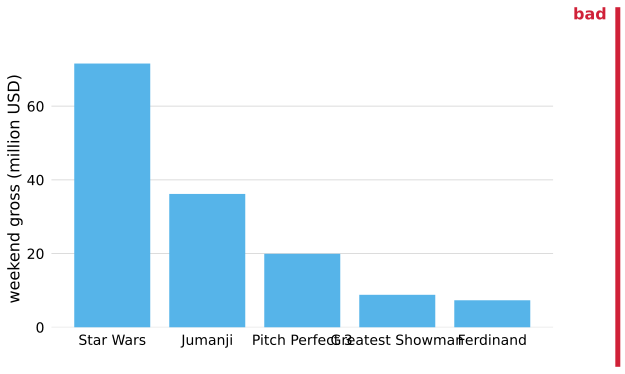

In [106]:
df_sorted = df_boxoffice.sort_values('rank')

# Create a bar plot
fig, ax = plt.subplots(figsize=figsize_rect)

# Set the labels
ax.set_xlabel('')
ax.set_ylabel('weekend gross (million USD)', fontsize=fs_m)
# ax.tick_params(axis='x', rotation=0)

# Set y-axis labels
plt.yticks([0, 2e7, 4e7, 6e7], ['0', '20', '40', '60'])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Set the same line properties on the y-ticks
for tick in ax.yaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

ax.bar(df_sorted['title_short'], df_sorted['amount'], color='#56B4E9')
stamp_bad(ax)
plt.show()

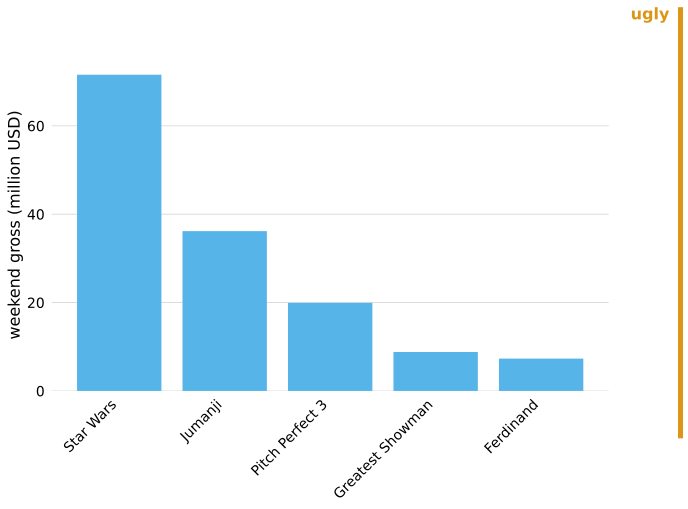

In [107]:
df_sorted = df_boxoffice.sort_values('rank')

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the labels
ax.set_xlabel('')
ax.set_ylabel('weekend gross (million USD)', fontsize=fs_m)
# ax.tick_params(axis='x', rotation=0)

# Set y-axis labels
plt.yticks([0, 2e7, 4e7, 6e7], ['0', '20', '40', '60'])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Set the same line properties on the y-ticks
for tick in ax.yaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Set x-tick labels with rotation
ax.set_xticks(range(len(df_sorted['title_short'])))
ax.set_xticklabels(df_sorted['title_short'], rotation=45, ha='right')


# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

ax.bar(df_sorted['title_short'], df_sorted['amount'], color='#56B4E9')
stamp_ugly(ax)
plt.show()

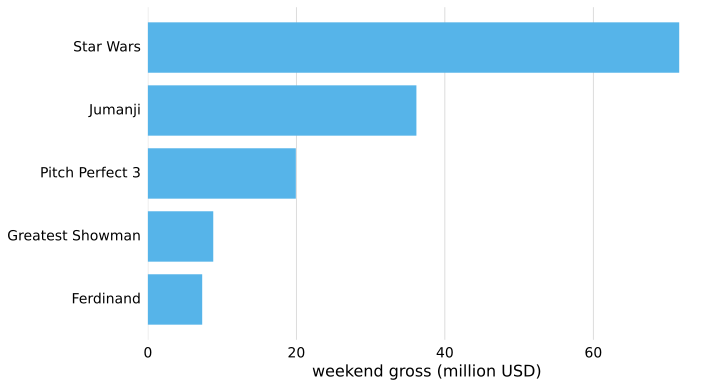

In [108]:
df_sorted = df_boxoffice.sort_values('rank', ascending=False)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the labels
ax.set_ylabel('')
ax.set_xlabel('weekend gross (million USD)', fontsize=fs_m)

# Set x-axis labels
ax.set_xticks([0, 2e7, 4e7, 6e7], ['0', '20', '40', '60'])

# Add vertical grid lines at the x-tick locations and set their color to light grey
ax.xaxis.grid(True, color='lightgrey')

# Set the same line properties on the x-ticks
for tick in ax.xaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the y-ticks but keep the labels
ax.tick_params(axis='both', which='both', left=False, right=False, top=False,
               bottom=False, labelsize=fs_s)

# Set y-tick labels with rotation
ax.set_yticks(range(len(df_sorted['title_short'])))
ax.set_yticklabels(df_sorted['title_short'], rotation=0, va='center')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

ax.barh(df_sorted['title_short'], df_sorted['amount'], color='#56B4E9')

plt.show()

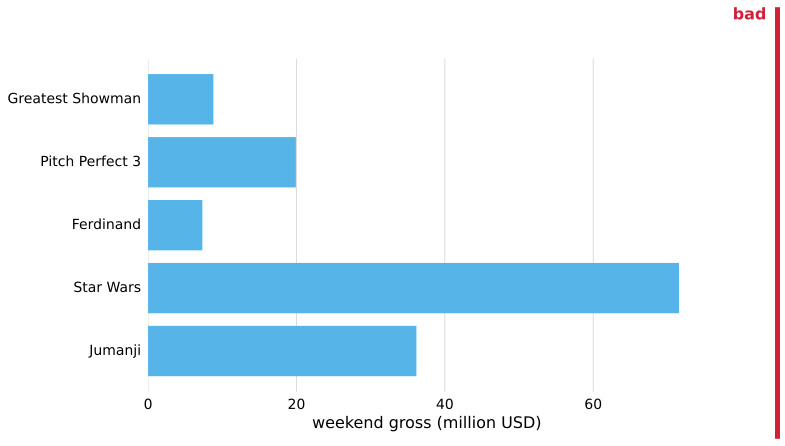

In [109]:
df_boxoffice['title_length'] = df_boxoffice['title_short'].apply(len)
df_sorted = df_boxoffice.sort_values('title_length', ascending=True).reset_index(drop=True)
df_boxoffice.drop(columns='title_length', inplace=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the labels
ax.set_ylabel('')
ax.set_xlabel('weekend gross (million USD)', fontsize=fs_m)

# Set x-axis labels
ax.set_xticks([0, 2e7, 4e7, 6e7], ['0', '20', '40', '60'])

# Add vertical grid lines at the x-tick locations and set their color to light grey
ax.xaxis.grid(True, color='lightgrey')

# Set the same line properties on the x-ticks
for tick in ax.xaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the y-ticks but keep the labels
ax.tick_params(axis='both', which='both', left=False, right=False, top=False,
               bottom=False, labelsize=fs_s)

# Set y-tick labels with rotation
ax.set_yticks(range(len(df_sorted['title_short'])))
ax.set_yticklabels(df_sorted['title_short'], rotation=0, va='center')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

ax.barh(df_sorted['title_short'], df_sorted['amount'], color='#56B4E9')

stamp_bad(ax)
plt.show()

In [13]:
income_by_age = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'income_by_age', 'income_by_age.csv'))

# Replace "75 and over" with "> 74" in the 'age' column
income_by_age['age'] = income_by_age['age'].replace('75 and over', '> 74')

# Define the order of the age groups
age_order = ["15 to 24", "25 to 34", "35 to 44", "45 to 54", "55 to 64", "65 to 74", "> 74"]

# Convert the 'age' column to a categorical type with the specified order
income_by_age['age'] = pd.Categorical(income_by_age['age'], categories=age_order, ordered=True)

income_by_age = income_by_age[income_by_age['race'] == 'all']

In [14]:
income_by_age

,age,year,median_income,race
0,15 to 24,2016,41655,all
1,25 to 34,2016,60932,all
2,35 to 44,2016,74481,all
3,45 to 54,2016,77213,all
4,55 to 64,2016,65239,all
5,65 to 74,2016,49072,all
6,> 74,2016,31313,all


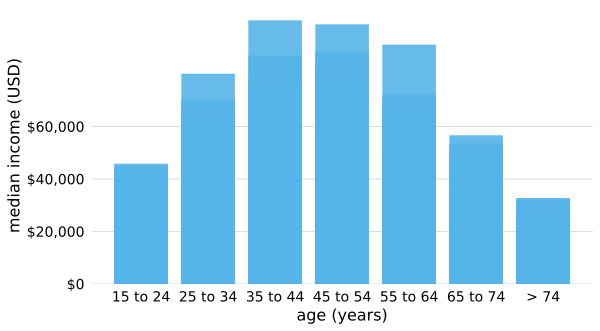

In [110]:
# Create a bar plot
fig, ax = plt.subplots(figsize=figsize_rect)

ax.bar(income_by_age['age'], income_by_age['median_income'], color='#56B4E9', alpha=0.9)

# Set the labels
ax.set_ylabel('median income (USD)', fontsize=fs_m)
ax.set_xlabel('age (years)', fontsize=fs_m)

# Set y-axis labels
ax.set_yticks([0, 20000, 40000, 60000], ['$0', '$20,000', '$40,000', '$60,000'])

# Remove the spines
for loc in ['top', 'right', 'left']:
    ax.spines[loc].set_visible(False)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Set the same line properties on the y-ticks
for tick in ax.yaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

plt.show()

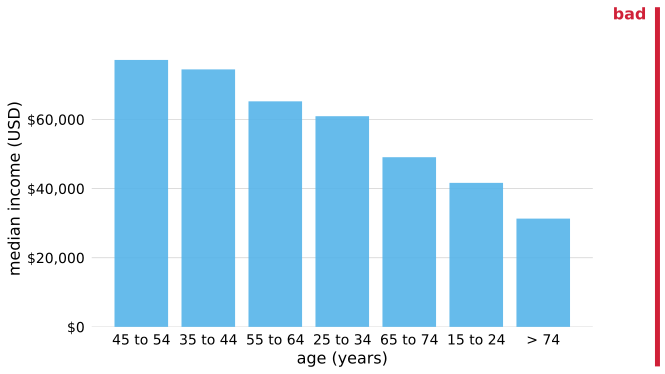

In [115]:
# Assuming income_by_age is a pandas DataFrame
income_by_age_filtered = income_by_age[income_by_age['race'] == 'all']

# Sort by median_income in descending order
income_by_age_sorted = income_by_age_filtered.sort_values('median_income', ascending=False)

fig, ax = plt.subplots(figsize=figsize_rect)

# Create bar plot
ax.bar(income_by_age_sorted['age'], income_by_age_sorted['median_income'], color="#56B4E9", alpha=0.9)

# Set y-axis labels and limits
ax.set_yticks([0, 20000, 40000, 60000])
ax.set_yticklabels(["$0", "$20,000", "$40,000", "$60,000"])
ax.set_ylim(0, 80000)

# Set x-axis label
ax.set_xlabel('age (years)', fontsize=fs_m)

# Set y-axis label
ax.set_ylabel('median income (USD)', fontsize=fs_m)

# Remove x-axis ticks
ax.xaxis.set_ticks_position('none')

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Set the same line properties on the y-ticks
for tick in ax.yaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove axis line
ax.spines[:].set_visible(False)

# Add stamp
stamp_bad(ax)

plt.show()

## Grouped and stacked bars

In [202]:
income_by_age = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'income_by_age', 'income_by_age.csv'))

# Replace "75 and over" with "> 74" in the 'age' column
income_by_age['age'] = income_by_age['age'].replace('75 and over', '> 74')
income_by_age['age'] = income_by_age['age'].replace({'≥ 75': '> 74'})

income_df = income_by_age[income_by_age['race'].isin(['white', 'asian', 'black', 'hispanic'])]

# Relevel race
race_order = ['asian', 'white', 'hispanic', 'black']
race_tmp = pd.Categorical(income_df['race'].copy(), categories=race_order, ordered=True)

# Recode race and age
income_df.loc[:, 'race'] = race_tmp.rename_categories({'asian': 'Asian', 'hispanic': 'Hispanic'})

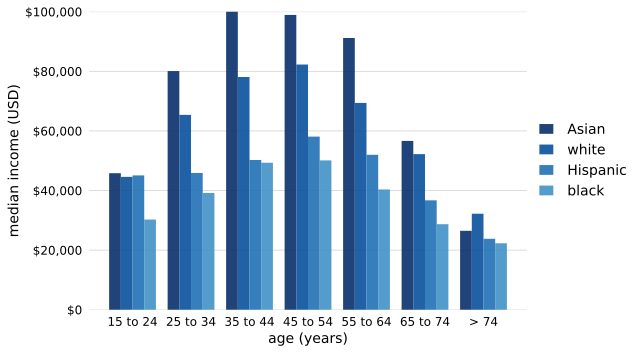

In [203]:
# Define colors
colors_four = ['#08306b', '#08519c', '#2171b5', '#4292c6']

# Positions
x = np.arange(len(income_df['age'].unique()))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=figsize_rect)

# Create bar plot
multiplier = 0
for i, race in enumerate(['Asian', 'white', 'Hispanic', 'black']):
    data = income_df[income_df['race'] == race]
    
    offset = width * multiplier
    rects = ax.bar(x + offset, data['median_income'], width, color=colors_four[i], alpha=0.9, label=race)
    
    multiplier += 1

# Set y-axis labels and limits
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])
ax.set_yticklabels(["$0", "$20,000", "$40,000", "$60,000", "$80,000", "$100,000"])
ax.set_ylim(0, 100000)

ax.tick_params(axis='both', bottom=False, left=False, labelsize=12)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Set x-axis label
ax.set_xlabel('age (years)', fontsize=fs_s)

# Set y-axis label
ax.set_ylabel('median income (USD)', fontsize=fs_s)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + (0.5*len(race_order)-0.5)*width, income_df['age'].unique())

# Remove axis line
ax.spines[:].set_visible(False)

# Add legend
ax.legend(ncols=1, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False,
          handlelength=1, handletextpad=1, fontsize=fs_s)

fig.tight_layout()

plt.show()

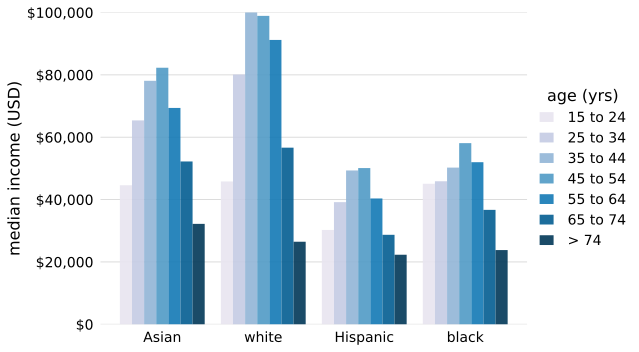

In [225]:
# Define colors
colors_seven = plt.cm.PuBu(np.linspace(0, 1, 8))[1:8]

# Positions
x = np.arange(len(race_order))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=figsize_rect)

ages_order = ['15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '> 74']

race_order = ['Asian', 'white', 'Hispanic', 'black']

# Create bar plot
multiplier = 0
for i, age in enumerate(ages_order):
    data = income_df[income_df['age'] == age]
    
    offset = width * multiplier
    rects = ax.bar(x + offset, data['median_income'], width, color=colors_seven[i], alpha=0.9, label=age)
    
    multiplier += 1

# Set y-axis labels and limits
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])
ax.set_yticklabels(["$0", "$20,000", "$40,000", "$60,000", "$80,000", "$100,000"])
ax.set_ylim(0, 100000)

ax.tick_params(axis='both', bottom=False, left=False, labelsize=fs_s)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Set x-axis label
# ax.set_xlabel('race', fontsize=fs_s)

# Set y-axis label
ax.set_ylabel('median income (USD)', fontsize=fs_m)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + (0.5*len(ages_order)-0.5)*width, race_order)

# Remove axis line
ax.spines[:].set_visible(False)

# Add legend
legend = ax.legend(ncols=1, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False,
          handlelength=1, handletextpad=1, fontsize=fs_s, title='age (yrs)')

legend.get_title().set_fontsize(fs_m)  # Set font size

fig.tight_layout()

plt.show()

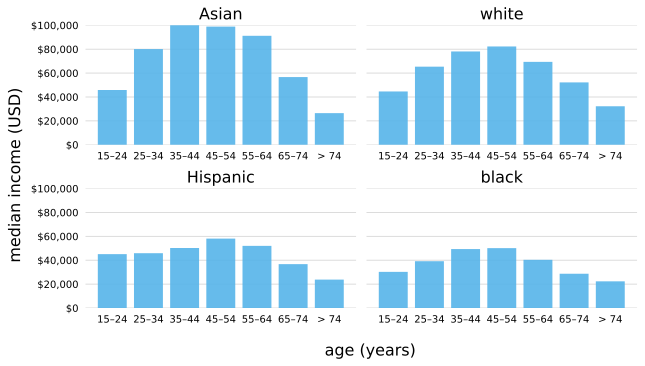

In [261]:
income_age_abbrev_df = income_df.copy()

# Recode age
age_mapping = {"15–24": "15 to 24", "25–34": "25 to 34", "35–44": "35 to 44",
               "45–54": "45 to 54", "55–64": "55 to 64", "65–74": "65 to 74"}
bla = {v: k for k,v in age_mapping.items()}
income_age_abbrev_df['age'] = income_age_abbrev_df['age'].replace(bla) # age_mapping

# Get unique races
races = income_age_abbrev_df['race'].unique()

# Create a grid of subplots, one for each race
fig, axs = plt.subplots(2, 2, figsize=figsize_rect, sharey=True)

for ax, race in zip(axs.flat, race_order):
    # Filter data for the race
    data = income_age_abbrev_df[income_age_abbrev_df['race'] == race]
    
    # Create bar plot
    ax.bar(data['age'], data['median_income'], color="#56B4E9", alpha=0.9)
    
    # Set y-axis labels and limits
    if i % 2 == 0:  # only for the first column
        ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])
        ax.set_yticklabels(["$0", "$20,000", "$40,000", "$60,000", "$80,000", "$100,000"])

    ax.set_ylim(0, 100000)
    
    # Add horizontal grid lines at the y-tick locations and set their color to light grey
    ax.yaxis.grid(True, color='lightgrey')

    # Move gridlines to the background
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', bottom=False, left=False, labelsize=10)
    
    # Set title
    ax.set_title(race, fontsize=fs_m)
    
    # Remove x-axis ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Remove axis line
    ax.spines[:].set_visible(False)

fig.text(0.5, 0.01, 'age (years)', va='center', fontsize=fs_m)
fig.text(0.01, 0.5, 'median income (USD)', va='center', rotation=90, fontsize=fs_m)

plt.tight_layout()
# Adjust plot margins
fig.subplots_adjust(left=0.13, bottom=0.13)

plt.show()

In [262]:
Titanic = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'titanic', 'Titanic.csv'))

titanic_all = Titanic.drop(columns=['SexCode'])
titanic_all = titanic_all.rename(columns={'Name': 'name', 'PClass': 'class', 'Age': 'age', 'Sex': 'sex', 'Survived': 'survived'})

# Convert columns to string
titanic_all[['name', 'class', 'sex']] = titanic_all[['name', 'class', 'sex']].astype(str)

titanic = titanic_all.drop(columns=['name']).dropna()

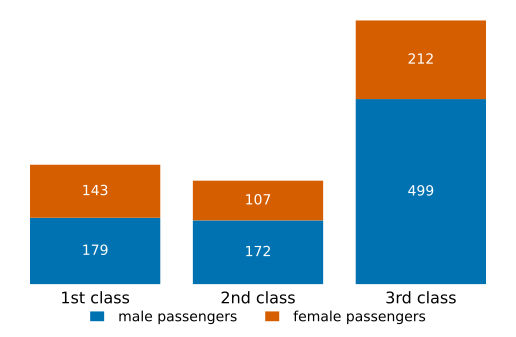

In [269]:
titanic_groups = titanic_all[titanic_all['class'] != "*"].copy()

# Group by class and sex, count the number of occurrences
titanic_groups = titanic_groups.groupby(['class', 'sex']).size().reset_index(name='n')

# Sort by class and sex
titanic_groups.sort_values(['class', 'sex'], ascending=[True, False], inplace=True)

# Calculate the position of the labels
titanic_groups['nlabel'] = titanic_groups.groupby('class')['n'].cumsum() - titanic_groups['n'] / 2

# Add "class" to the class names
titanic_groups['class'] = titanic_groups['class'] + " class"

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=figsize_rect)

for sex, color in zip(['male', 'female'], ['#0072B2', '#D55E00']):
    data = titanic_groups[titanic_groups['sex'] == sex]
    ax.bar(data['class'], data['n'], bottom=data['nlabel'] - data['n'] / 2, color=color, label=f'{sex} passengers')

# Add text labels
for _, row in titanic_groups.iterrows():
    ax.text(row['class'], row['nlabel'], str(row['n']), color='white', ha='center', va='center',
            fontsize=fs_s)

# Remove x-axis and y-axis labels
ax.set_xlabel(None)
ax.set_ylabel(None)

# Remove x-axis ticks
ax.xaxis.set_ticks_position('none')

# Remove y-axis
ax.yaxis.set_visible(False)

ax.tick_params(axis='both', bottom=False, left=False, labelsize=fs_m)

# Remove grid lines
ax.grid(False)

# Move the legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2,
          frameon=False,
          handlelength=1, handletextpad=1, fontsize=fs_s)

# Remove axis line
ax.spines[:].set_visible(False)

plt.show()

## Dot plots

In [14]:
countries = pd.read_csv(os.path.join(data_folder, 'ddf--gapminder--systema_globalis-master', 'ddf--entities--geo--country.csv'))
life_exp = pd.read_csv(os.path.join(data_folder, 'ddf--gapminder--systema_globalis-master', 'countries-etc-datapoints', 'ddf--datapoints--life_expectancy_at_birth_data_from_ihme--by--geo--time.csv'))

df = pd.merge(left=countries[['country', 'name', 'world_4region']], right=life_exp, left_on='country', right_on='geo')[['country', 'name', 'world_4region', 'time', 'life_expectancy_at_birth_data_from_ihme']]
df.columns = ['country', 'name', 'region', 'time', 'life_exp']

ctrs_interest = [
    "Argentina", "Bolivia", "Brazil", "Canada", "Chile", "Colombia", 
    "Costa Rica", "Cuba", "Dominican Republic", "Ecuador", "El Salvador", 
    "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", 
    "Panama", "Paraguay", "Peru", "Puerto Rico", "Trinidad and Tobago", 
    "United States", "Uruguay", "Venezuela"
]

# Filter the dataframe
df_americas = df[(df['time'] == 2007) & (df['region'] == 'americas')]
# df_americas

df_americas = df_americas[df_americas['name'].isin(ctrs_interest)]

In [15]:
df_americas

,country,name,region,time,life_exp
137,arg,Argentina,americas,2007,75.4
545,bol,Bolivia,americas,2007,70.6
569,bra,Brazil,americas,2007,73.8
713,can,Canada,americas,2007,80.6
761,chl,Chile,americas,2007,78.8
905,col,Colombia,americas,2007,74.9
977,cri,Costa Rica,americas,2007,79.5
1001,cub,Cuba,americas,2007,77.6
1169,dom,Dominican Republic,americas,2007,72.2
1217,ecu,Ecuador,americas,2007,73.9


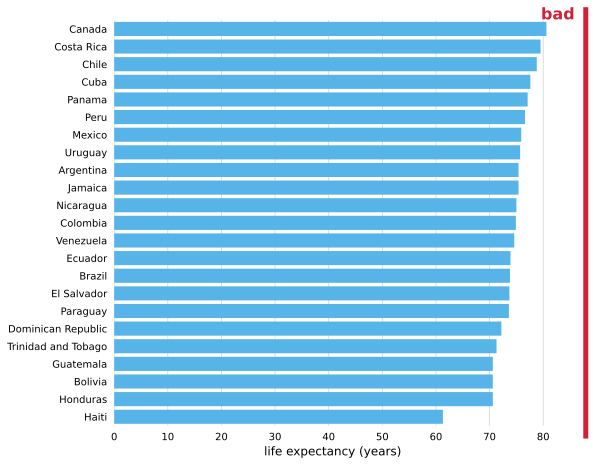

In [16]:
# Sort the dataframe by life_exp
df_americas = df_americas.sort_values('life_exp')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create horizontal bars
ax.barh(df_americas['name'], df_americas['life_exp'], color='#56B4E9')

# Set x and y limits
ax.set_xlim(0.0, 81.5)
ax.set_ylim(-0.5, len(df_americas['name']) - 0.5)

# Set x and y labels
ax.set_xlabel('life expectancy (years)', fontsize=12)
ax.set_ylabel('')

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove axis line
ax.spines[:].set_visible(False)

ax.tick_params(axis='both', bottom=False, left=False)

# Set plot margin
fig.subplots_adjust(left=0.18, right=0.94, top=0.97, bottom=0.03)

stamp_bad(ax)

# Show the plot
plt.show()

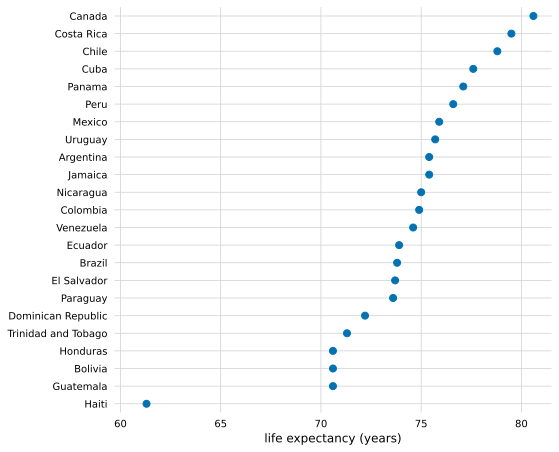

In [20]:
# Sort the dataframe by lifeExp
df_americas = df_americas.sort_values('life_exp')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_americas['life_exp'], df_americas['name'], color='#0072B2', s=50)

# Set x and y limits
ax.set_xlim(59.7, 81.5)
ax.set_ylim(-0.5, len(df_americas['name']) - 0.5)

ax.set_xticks([60, 65, 70, 75, 80])

# Set x and y labels
ax.set_xlabel('life expectancy (years)', fontsize=12)
ax.set_ylabel('')

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove axis line
ax.spines[:].set_visible(False)

ax.tick_params(axis='both', bottom=False, left=False)

# Set plot margin
plt.subplots_adjust(left=0.18, right=0.94, top=0.97, bottom=0.03)

# Show the plot
plt.show()

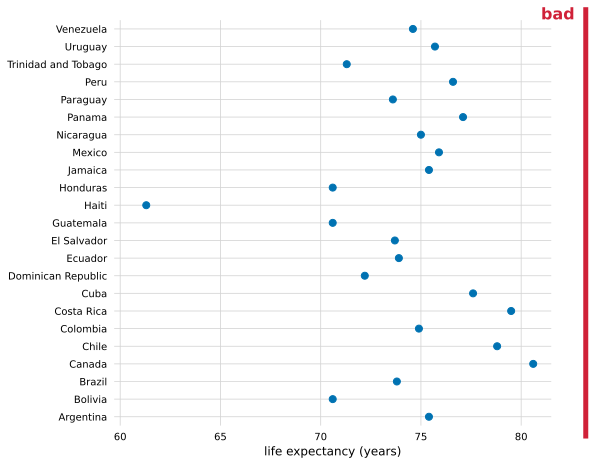

In [22]:
# Sort the dataframe by name
df_americas = df_americas.sort_values('name')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_americas['life_exp'], df_americas['name'], color='#0072B2', s=50)

# Set x and y limits
ax.set_xlim(59.7, 81.5)
ax.set_ylim(-0.5, len(df_americas['name']) - 0.5)

ax.set_xticks([60, 65, 70, 75, 80])

# Set x and y labels
ax.set_xlabel('life expectancy (years)', fontsize=12)
ax.set_ylabel('')

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove axis line
ax.spines[:].set_visible(False)

ax.tick_params(axis='both', bottom=False, left=False)

# Set plot margin
plt.subplots_adjust(left=0.18, right=0.94, top=0.97, bottom=0.03)

stamp_bad(ax)

# Show the plot
plt.show()